# Exp 5: Integrated Experiment # 
## 1.	Aims ##

#### 1. Be familiar with the operations of morphological image processing. 

#### 2. Be familiar with the operations of image segmentation.
    
#### 3. Try to design GUI in Python.

## 2.	Steps and Requirements

### (1) Erosion, Dilation, Opening and Closing.	

(a) Load the RGB image clock2.jpg. Convert it to grayscale and then convert it into a binary image using a threshold of 0.5.

(b) Use an SE as [1 1 1; 1 1 1; 1 1 1] to obtain the binary morphological erosion, dilation, opening and closing of the binary image. Display them in the same figure with sub-figures. Add the corresponding title to the sub-figure.

(c) Use an SE as [1 0 0; 0 1 0; 0 0 1] to obtain the binary morphological erosion, dilation, opening and closing of the binary image. Display them in the same figure with sub-figures. Add the corresponding title to the sub-figure.

(d) Load the RGB image zebras.jpg. Convert it to grayscale. 

(e) Use a 3x3 SE to obtain the grayscale morphological erosion, dilation, opening and closing of grayscale image. Display them in the same figure with sub-figures. Add the corresponding title to the sub-figure.

(f) Use a 7x7 SE to obtain the grayscale morphological erosion, dilation, opening and closing of grayscale image. Display them in the same figure with sub-figures. Add the corresponding title to the sub-figure.

Hint:``skimage.morphology.binary_erosion``, ``skimage.morphology.binary_dilation``, ``skimage.morphology.binary_opening``, ``skimage.morphology.binary_closing``, ``skimage.morphology.erosion``, ``skimage.morphology.dilation``, ``skimage.morphology.opening`` and ``skimage.morphology.closing``

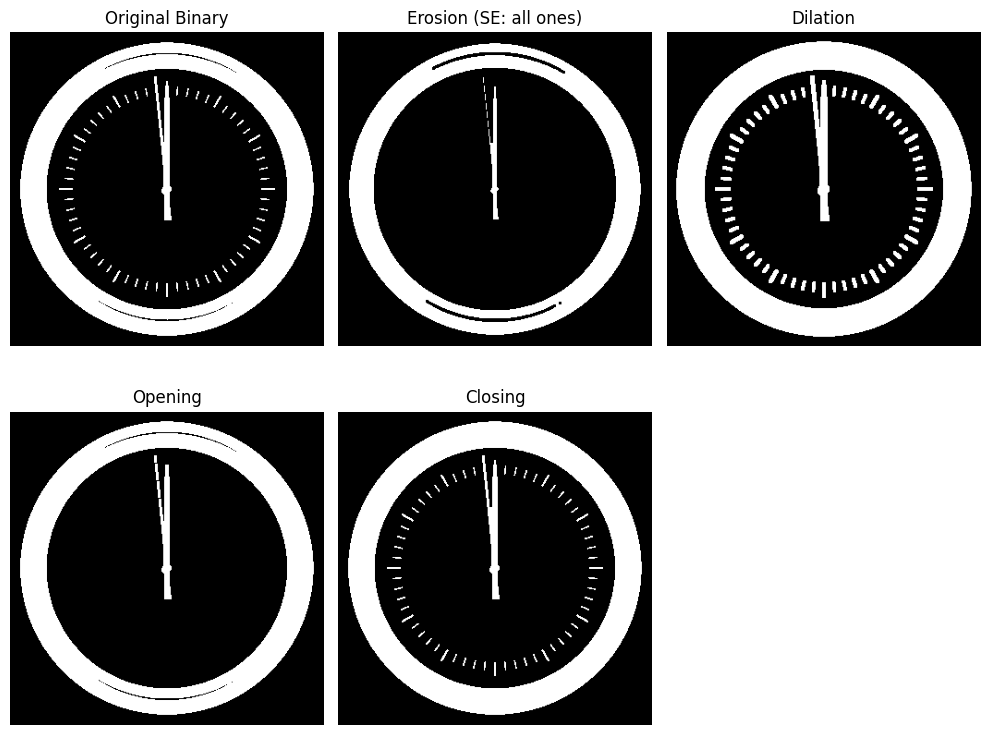

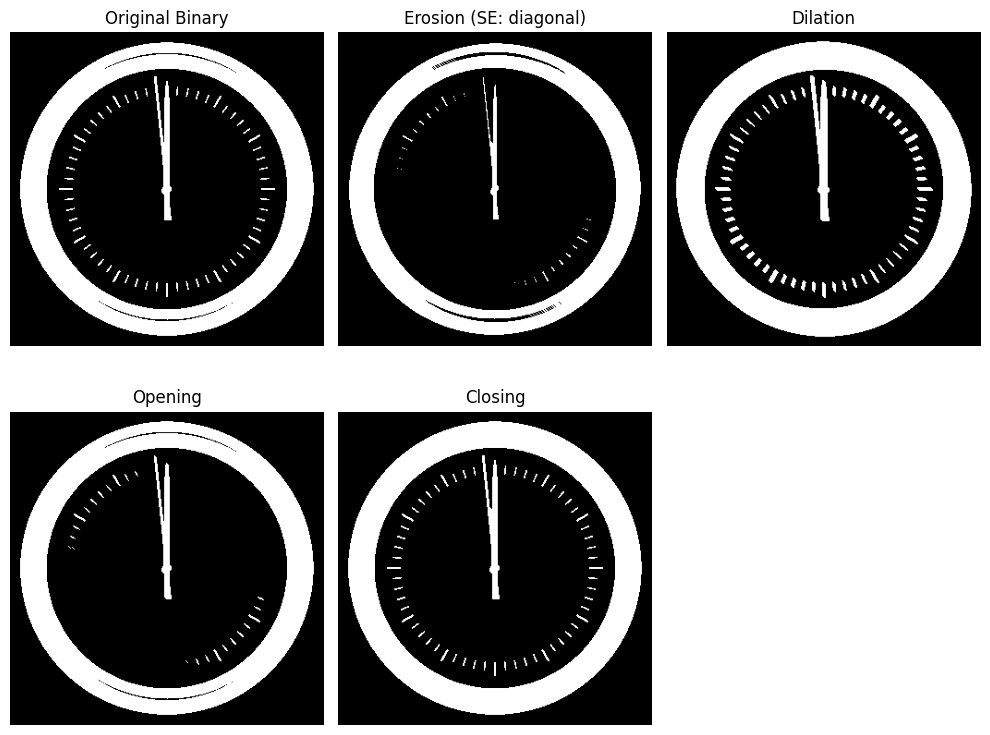

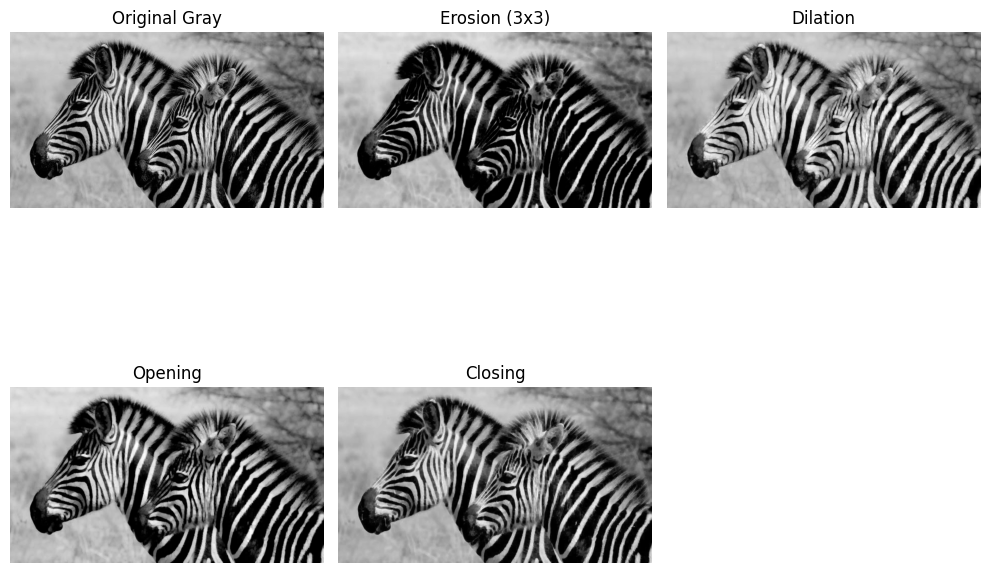

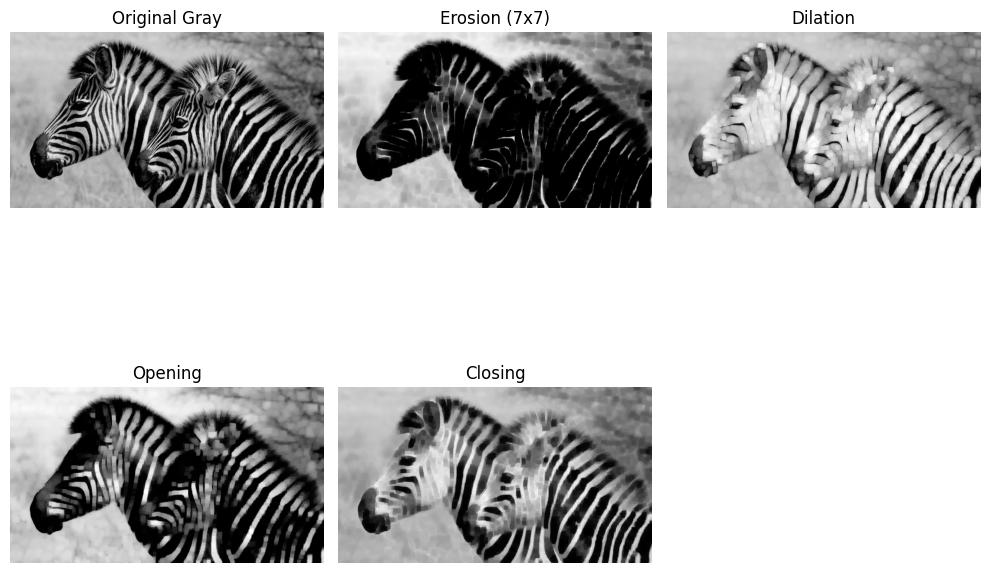

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from skimage import io, color
from skimage.morphology import (
    binary_erosion, binary_dilation, binary_opening, binary_closing,
    erosion, dilation, opening, closing, square
)
from skimage.filters import threshold_otsu

# (a) Load clock2.jpg, convert to grayscale and then binary using threshold 0.5
image_rgb = io.imread('images/clock2.jpg')
image_gray = color.rgb2gray(image_rgb)
binary_image = image_gray > 0.5

# (b) Morphological operations with SE [1 1 1; 1 1 1; 1 1 1]
se1 = np.ones((3, 3), dtype=bool)
erosion1 = binary_erosion(binary_image, se1)
dilation1 = binary_dilation(binary_image, se1)
opening1 = binary_opening(binary_image, se1)
closing1 = binary_closing(binary_image, se1)

plt.figure(figsize=(10, 8))
titles = ['Original Binary', 'Erosion (SE: all ones)', 'Dilation', 'Opening', 'Closing']
images = [binary_image, erosion1, dilation1, opening1, closing1]
for i in range(5):
    plt.subplot(2, 3, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')
plt.tight_layout()
plt.show()

# (c) Morphological operations with SE [1 0 0; 0 1 0; 0 0 1]
se2 = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]], dtype=bool)
erosion2 = binary_erosion(binary_image, se2)
dilation2 = binary_dilation(binary_image, se2)
opening2 = binary_opening(binary_image, se2)
closing2 = binary_closing(binary_image, se2)

plt.figure(figsize=(10, 8))
titles = ['Original Binary', 'Erosion (SE: diagonal)', 'Dilation', 'Opening', 'Closing']
images = [binary_image, erosion2, dilation2, opening2, closing2]
for i in range(5):
    plt.subplot(2, 3, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')
plt.tight_layout()
plt.show()

# (d) Load zebras.jpg and convert to grayscale
zebra_rgb = io.imread('images/zebras.jpg')
zebra_gray = color.rgb2gray(zebra_rgb)

# (e) Grayscale morphological operations with 3x3 SE
se3 = np.ones((3, 3), dtype=bool)
erosion3 = erosion(zebra_gray, se3)
dilation3 = dilation(zebra_gray, se3)
opening3 = opening(zebra_gray, se3)
closing3 = closing(zebra_gray, se3)

plt.figure(figsize=(10, 8))
titles = ['Original Gray', 'Erosion (3x3)', 'Dilation', 'Opening', 'Closing']
images = [zebra_gray, erosion3, dilation3, opening3, closing3]
for i in range(5):
    plt.subplot(2, 3, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')
plt.tight_layout()
plt.show()

# (f) Grayscale morphological operations with 7x7 SE
se4 = np.ones((7, 7), dtype=bool)
erosion4 = erosion(zebra_gray, se4)
dilation4 = dilation(zebra_gray, se4)
opening4 = opening(zebra_gray, se4)
closing4 = closing(zebra_gray, se4)

plt.figure(figsize=(10, 8))
titles = ['Original Gray', 'Erosion (7x7)', 'Dilation', 'Opening', 'Closing']
images = [zebra_gray, erosion4, dilation4, opening4, closing4]
for i in range(5):
    plt.subplot(2, 3, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')
plt.tight_layout()
plt.show()


### (2) Boundary Extraction and Hole Filling

(a) Load the image boundary.tif. Convert it into a binary image.

(b) Use a 5x5 SE of 1s to obtain the binary morphological erosion of the binary image.

(c) Obtian the boundary of the binary image via performing the difference between the binary image and its erosion image.

(d) Load the image holefiling.tif. Convert it into a binary image.

(e) Fill the holes in binary objects. (Hine:``scipy.ndimage.binary_fill_holes``)

(f) Display them in the same figure with sub-figures. Add the corresponding title to the sub-figure.

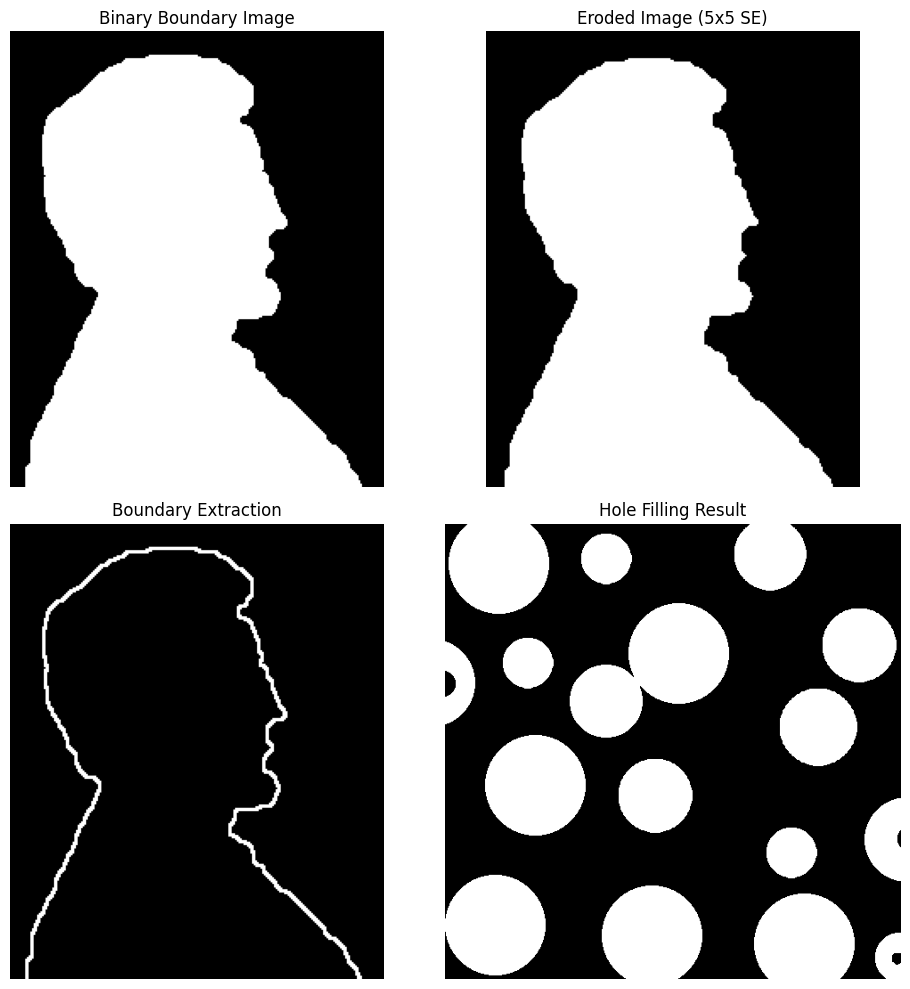

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import binary_fill_holes

# (a) Load boundary.tif and convert to binary image
img_boundary = cv2.imread('images/boundary.tif', cv2.IMREAD_GRAYSCALE)
_, binary_boundary = cv2.threshold(img_boundary, 127, 1, cv2.THRESH_BINARY)

# (b) Morphological erosion with a 5x5 structuring element (SE)
se = np.ones((5,5), dtype=np.uint8)
eroded = cv2.erode(binary_boundary, se)

# (c) Boundary extraction = binary image - eroded image
boundary = binary_boundary - eroded
boundary[boundary < 0] = 0  # just in case

# (d) Load holefiling.tif and convert to binary image
img_hole = cv2.imread('images/holefiling.tif', cv2.IMREAD_GRAYSCALE)
_, binary_hole = cv2.threshold(img_hole, 127, 1, cv2.THRESH_BINARY)

# (e) Fill holes in the binary objects
filled_holes = binary_fill_holes(binary_hole).astype(np.uint8)

# (f) Display images with titles in subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

axs[0,0].imshow(binary_boundary, cmap='gray')
axs[0,0].set_title('Binary Boundary Image')
axs[0,0].axis('off')

axs[0,1].imshow(eroded, cmap='gray')
axs[0,1].set_title('Eroded Image (5x5 SE)')
axs[0,1].axis('off')

axs[1,0].imshow(boundary, cmap='gray')
axs[1,0].set_title('Boundary Extraction')
axs[1,0].axis('off')

axs[1,1].imshow(filled_holes, cmap='gray')
axs[1,1].set_title('Hole Filling Result')
axs[1,1].axis('off')

plt.tight_layout()
plt.show()


### (3) Thining and Convex Hull
(a) Load the image CT.tif. Convert it into a binary image.

(b) Perform morphological thinning of a binary image. (Hint:``skimage.morphology.thin``, set the parameter of max_iter to 5, 50, and none, respectively.</font>)

(c) Compute the convex hull image of a binary image. (Hint:``skimage.morphology.convex_hull_image``)

(d) Display them in the same figure with sub-figures. Add the corresponding title to the sub-figure.

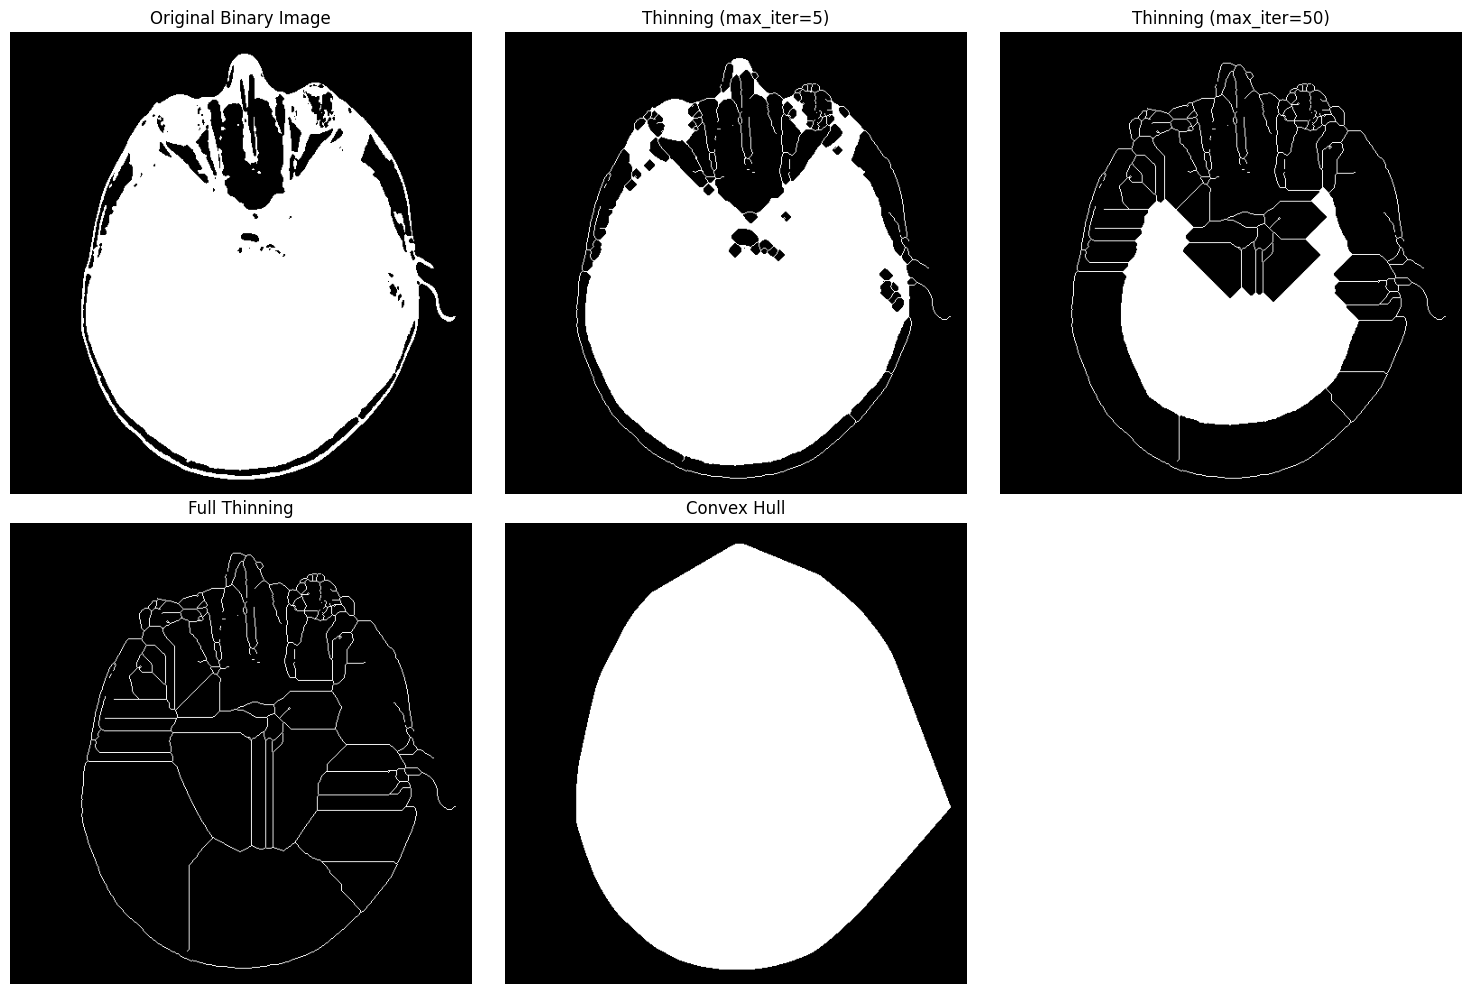

In [7]:
import matplotlib.pyplot as plt
from skimage import io, color
from skimage.filters import threshold_otsu
from skimage.morphology import thin, convex_hull_image

# (a) Load and binarize the image
image = io.imread('images/CT.tif')
if image.ndim == 3:
    image_gray = color.rgb2gray(image)
else:
    image_gray = image
thresh = threshold_otsu(image_gray)
binary_image = image_gray > thresh

# (b) Perform morphological thinning
thin_5 = thin(binary_image, max_num_iter=5)
thin_50 = thin(binary_image, max_num_iter=50)
thin_full = thin(binary_image)  # max_iter=None by default

# (c) Compute the convex hull
convex = convex_hull_image(binary_image)

# (d) Display all results
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
ax = axes.ravel()

ax[0].imshow(binary_image, cmap='gray')
ax[0].set_title('Original Binary Image')
ax[1].imshow(thin_5, cmap='gray')
ax[1].set_title('Thinning (max_iter=5)')
ax[2].imshow(thin_50, cmap='gray')
ax[2].set_title('Thinning (max_iter=50)')
ax[3].imshow(thin_full, cmap='gray')
ax[3].set_title('Full Thinning')
ax[4].imshow(convex, cmap='gray')
ax[4].set_title('Convex Hull')
ax[5].axis('off')  # Unused subplot

for a in ax:
    a.axis('off')

plt.tight_layout()
plt.show()


### (4) Top-hat (white top-hat) and Bottom-hat (black top-hat) Transformation

(a) Load the grayscale image rice.tif. Convert it into a binary image with a threshold of 0.5.

(b) Perform top-hat transformation to the grayscale image. (Hint:``skimage.morphology.white_tophat``, set the parameter of footprint to ``skimage.morphology.square(81)``)

(c) Obtain thresholded top-hat image and convert it into a binary image.

(d) Perform bottom-hat transformation to the grayscale image. (Hint:``skimage.morphology.black_tophat``, set the parameter of footprint to ``skimage.morphology.square(81)``)

(e) Obtain thresholded bottom-hat image and convert it into a binary image.

(f) Display them in the same figure with sub-figures. Add the corresponding title to the sub-figure.


C:\Users\LuJiaWei\AppData\Local\Temp\ipykernel_12436\4072670333.py:13: FutureWarning: `square` is deprecated since version 0.25 and will be removed in version 0.27. Use `skimage.morphology.footprint_rectangle` instead.
  footprint = morphology.square(81)


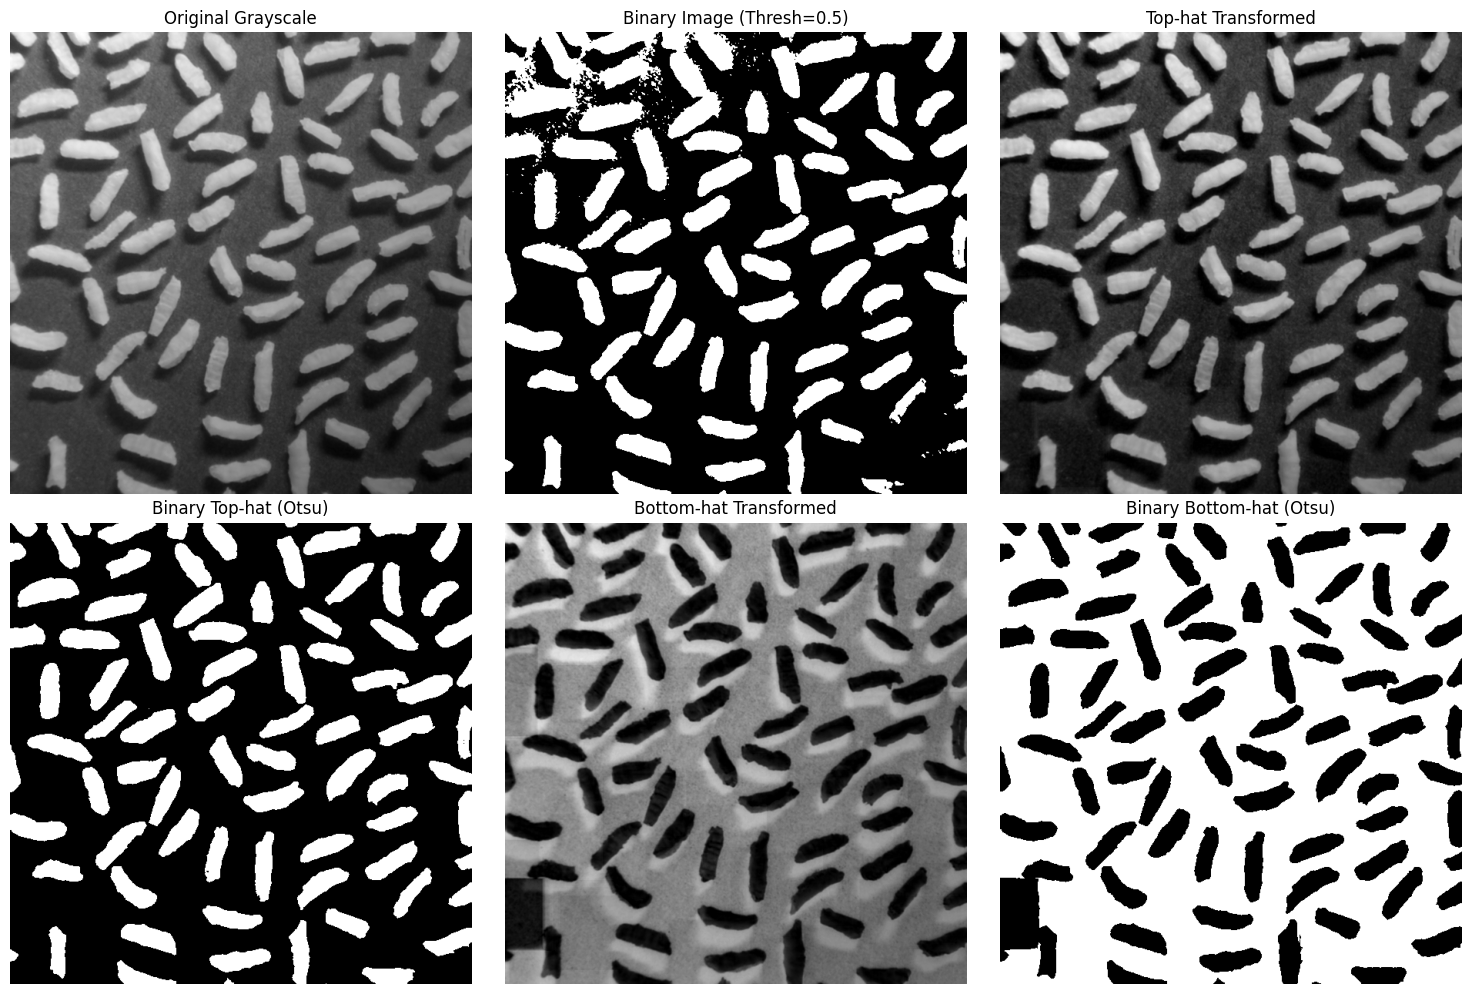

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, filters, morphology, util
from skimage.color import rgb2gray
from skimage.io import imread
from skimage.filters import threshold_otsu

# (a) Load grayscale image and convert to binary with threshold 0.5
io.imread('images/rice.tif')
binary_image = image > 0.5 * 255  # since rice.tif is uint8

# (b) Perform top-hat transformation (white top-hat)
footprint = morphology.square(81)
tophat_image = morphology.white_tophat(image, footprint=footprint)

# (c) Threshold top-hat image and convert to binary
thresh_tophat = threshold_otsu(tophat_image)
binary_tophat = tophat_image > thresh_tophat

# (d) Perform bottom-hat transformation (black top-hat)
bothat_image = morphology.black_tophat(image, footprint=footprint)

# (e) Threshold bottom-hat image and convert to binary
thresh_bothat = threshold_otsu(bothat_image)
binary_bothat = bothat_image > thresh_bothat

# (f) Display all images
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
ax = axes.ravel()

ax[0].imshow(image, cmap='gray')
ax[0].set_title("Original Grayscale")

ax[1].imshow(binary_image, cmap='gray')
ax[1].set_title("Binary Image (Thresh=0.5)")

ax[2].imshow(tophat_image, cmap='gray')
ax[2].set_title("Top-hat Transformed")

ax[3].imshow(binary_tophat, cmap='gray')
ax[3].set_title("Binary Top-hat (Otsu)")

ax[4].imshow(bothat_image, cmap='gray')
ax[4].set_title("Bottom-hat Transformed")

ax[5].imshow(binary_bothat, cmap='gray')
ax[5].set_title("Binary Bottom-hat (Otsu)")

# Remove axes for better viewing
for a in ax:
    a.axis('off')

plt.tight_layout()
plt.show()


### (5) Edge Detection
(a) Load the image building.tif. 

(b) Find edges in an image using the Roberts' cross operators, Sobel operators, Prewitt operators, and the Canny algorithm. (Hint:``skimage.filters.roberts``, ``skimage.filters.sobel``,  ``skimage.filters.prewitt``, ``skimage.feature.canny``)

(c) Display them in the same figure with sub-figures. Add the corresponding title to the sub-figure.

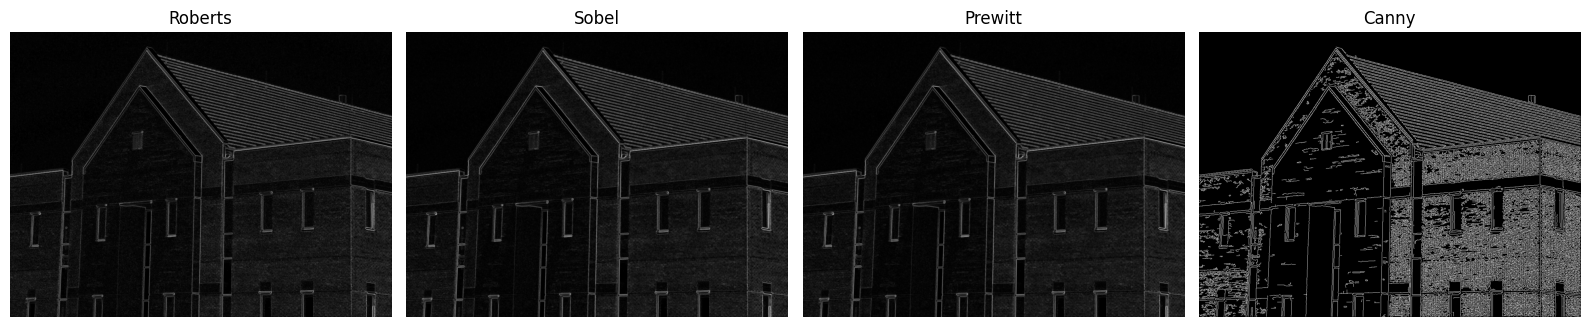

In [13]:
import matplotlib.pyplot as plt
from skimage import io, color, filters, feature

# (a) Load the image
image = io.imread('images/building.tif')

# If image is color, convert to grayscale for edge detection
if image.ndim == 3:
    image_gray = color.rgb2gray(image)
else:
    image_gray = image

# (b) Edge detection using different operators
edges_roberts = filters.roberts(image_gray)
edges_sobel = filters.sobel(image_gray)
edges_prewitt = filters.prewitt(image_gray)
edges_canny = feature.canny(image_gray)

# (c) Display results in subplots
fig, axes = plt.subplots(1, 4, figsize=(16, 5))
axes[0].imshow(edges_roberts, cmap='gray')
axes[0].set_title("Roberts")
axes[0].axis('off')

axes[1].imshow(edges_sobel, cmap='gray')
axes[1].set_title("Sobel")
axes[1].axis('off')

axes[2].imshow(edges_prewitt, cmap='gray')
axes[2].set_title("Prewitt")
axes[2].axis('off')

axes[3].imshow(edges_canny, cmap='gray')
axes[3].set_title("Canny")
axes[3].axis('off')

plt.tight_layout()
plt.show()


### (6) Edge-Based Segmentation
(a) Load the coins image in skimage. (Hint:``skimage.data.coins()``)

(b) Use Canny algorithm to obtain the edge image. (Hint:``skimage.feature.canny``, set the parameter of sigma to 3)

(c) Fill the holes to obtain the segmented image. (Hint:``scipy.ndimage.binary_fill_holes``)

(c) Display the images in the same figure with sub-figures. Add the corresponding title to the sub-figure.

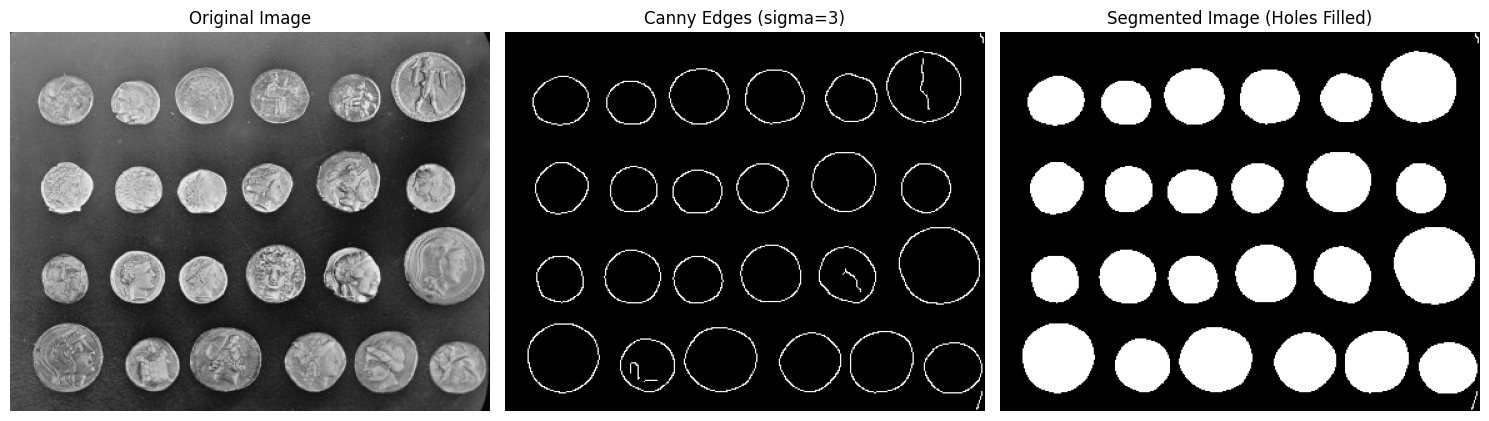

In [14]:
import matplotlib.pyplot as plt
from skimage import data, feature
from scipy import ndimage

# (a) Load the coins image
coins = data.coins()

# (b) Use Canny algorithm to detect edges (sigma=3)
edges = feature.canny(coins, sigma=3)

# (c) Fill the holes in the binary edge image
filled = ndimage.binary_fill_holes(edges)

# (d) Display the images with titles
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(coins, cmap='gray')
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(edges, cmap='gray')
axes[1].set_title('Canny Edges (sigma=3)')
axes[1].axis('off')

axes[2].imshow(filled, cmap='gray')
axes[2].set_title('Segmented Image (Holes Filled)')
axes[2].axis('off')

plt.tight_layout()
plt.show()


### (7) Hough transform
(a) Load the image triangle_circle.png. Convert it to grayscale.

(b) Perform a straight line Hough transform to the grayscale image. (Hint:``skimage.transform.hough_line``)

(c) Obtain the peaks in a straight line Hough transform. (Hint:``skimage.transform.hough_line_peaks``)

(d) Highlight the detected lines by red color. (Hint:``matplotlib.pyplot.axline``)

(e) Display them in the same figure with sub-figures. Add the corresponding title to the sub-figure.



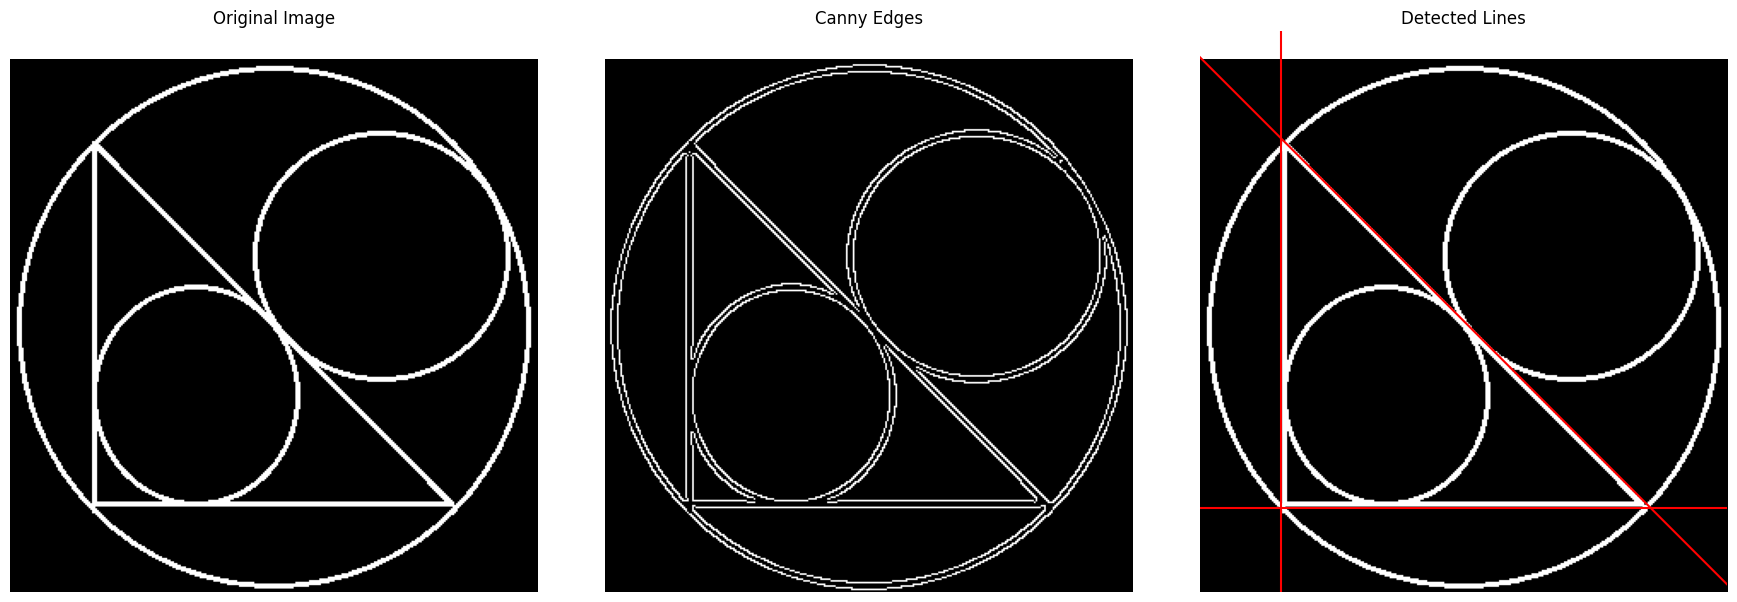

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, feature, transform

# (a) Load the image and convert to grayscale
image = io.imread('images/triangle_circle.png')
if image.shape[-1] == 4:
    image = image[..., :3]  # Remove alpha channel
gray = color.rgb2gray(image)

# (b) Perform straight line Hough transform
edges = feature.canny(gray)
hspace, angles, distances = transform.hough_line(edges)

# (c) Obtain peaks in the Hough transform
accum, angle_peaks, dist_peaks = transform.hough_line_peaks(hspace, angles, distances)

# (d) Plot original image, edges, and detected lines
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharex=True, sharey=True)

axes[0].imshow(image)
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(edges, cmap='gray')
axes[1].set_title('Canny Edges')
axes[1].axis('off')

axes[2].imshow(image)
axes[2].set_title('Detected Lines')
axes[2].axis('off')

# Highlight detected lines in red
for angle, dist in zip(angle_peaks, dist_peaks):
    if np.isclose(np.sin(angle), 0):
        # Vertical line case
        x = dist / np.cos(angle)
        axes[2].axvline(x=x, color='red')
    else:
        slope = -np.cos(angle) / np.sin(angle)
        intercept = dist / np.sin(angle)
        axes[2].axline((0, intercept), slope=slope, color='red')

plt.tight_layout()
plt.show()


### (8) Thresholding-Based Segmentation 
(a) Load the image shade_text1.tif. 

(b) Perform automatic image thresholding by Otsu's method to get the threshold value. (Hint:``skimage.filters.threshold_otsu``)

(c) Transform the grayscale image into a binary image using the threshold value obtained by Otsu's method.

(d) Compute a moving average threshold. (Hint:``cv2.blur``)

(e) Obtain the result of local thresholding using moving averages.

(f) Display them in the same figure with sub-figures. Add the corresponding title to the sub-figure.

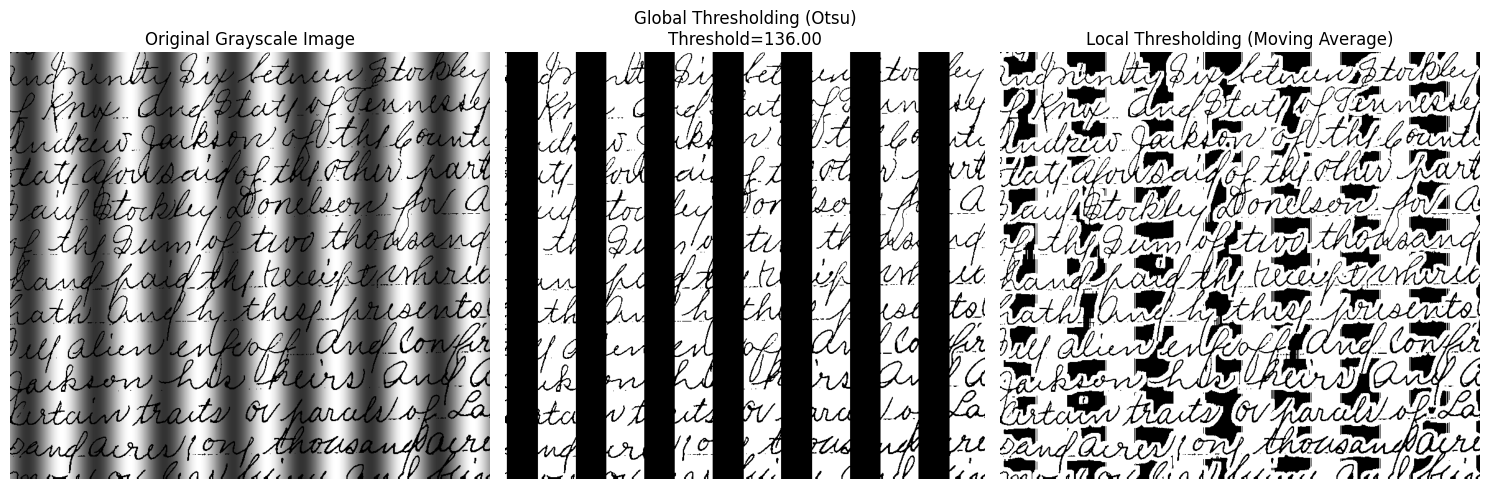

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, filters

# (a) Load the image
image = io.imread('images/shade_text1.tif', as_gray=True)

# (b) Otsu's method to get threshold value
otsu_thresh = filters.threshold_otsu(image)

# (c) Convert grayscale to binary using Otsu's threshold
binary_otsu = image > otsu_thresh

# (d) Compute moving average threshold using cv2.blur
blur = cv2.blur(image, ksize=(15, 15))  # you can adjust the kernel size

# (e) Local thresholding using moving averages
binary_local = image > blur

# (f) Display all results in one figure
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(image, cmap='gray')
axes[0].set_title('Original Grayscale Image')
axes[0].axis('off')

axes[1].imshow(binary_otsu, cmap='gray')
axes[1].set_title(f'Global Thresholding (Otsu)\nThreshold={otsu_thresh:.2f}')
axes[1].axis('off')

axes[2].imshow(binary_local, cmap='gray')
axes[2].set_title('Local Thresholding (Moving Average)')
axes[2].axis('off')

plt.tight_layout()
plt.show()


### (9) Segmentation Using Morphological Watersheds
(a) Load the coins image by skimage. (Hint:``skimage.data.coins()``)

(b) Find edges as the elevation map in an image using the Sobel filter. (Hint:``skimage.filters.sobel``)

(c) Define the markers as follow:
```python
markers = np.zeros_like(coins)
markers[coins < 30] = 1
markers[coins > 150] = 2
```
(d) Obtain the segmentation result by morphological Watersheds.  (Hint:``skimage.morphology.watershed``)

(e) Display them in the same figure with sub-figures. Add the corresponding title to the sub-figure.

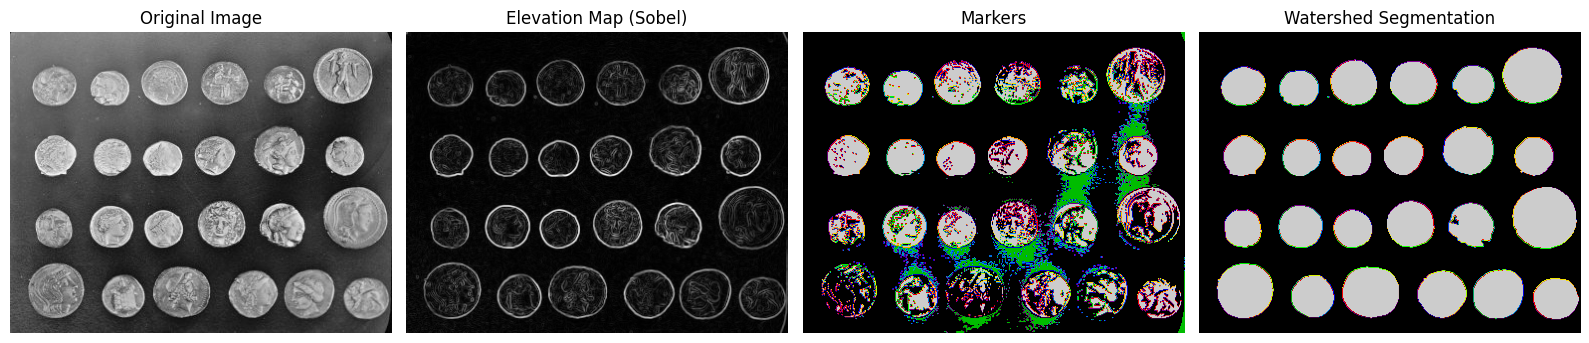

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, filters
from skimage.segmentation import watershed

# (a) Load the coins image
coins = data.coins()

# (b) Use Sobel filter to get the elevation map (edges)
elevation_map = filters.sobel(coins)

# (c) Define markers based on intensity thresholds
markers = np.zeros_like(coins)
markers[coins < 30] = 1
markers[coins > 150] = 2

# (d) Perform morphological watershed segmentation
segmentation_result = watershed(elevation_map, markers)

# (e) Display the results
fig, axes = plt.subplots(1, 4, figsize=(16, 5))
ax = axes.ravel()

ax[0].imshow(coins, cmap='gray')
ax[0].set_title("Original Image")
ax[0].axis('off')

ax[1].imshow(elevation_map, cmap='gray')
ax[1].set_title("Elevation Map (Sobel)")
ax[1].axis('off')

ax[2].imshow(markers, cmap='nipy_spectral')
ax[2].set_title("Markers")
ax[2].axis('off')

ax[3].imshow(segmentation_result, cmap='nipy_spectral')
ax[3].set_title("Watershed Segmentation")
ax[3].axis('off')

plt.tight_layout()
plt.show()


### (10) Image Processing Software with GUI

* Use QT or other tools to design an image processing toolbox with GUI. There is no limitation on implementations. 

* The GUI contain at least one basic image processing function, can it can display the input image and the processed image.

* <font color=Blue>Submit a video recording to demonstrate the function of your GUI design in your report.</font>

In [1]:
import sys
import cv2
import numpy as np
from PyQt5.QtWidgets import (
    QApplication, QLabel, QWidget, QVBoxLayout, QPushButton, QFileDialog, QHBoxLayout, QComboBox
)
from PyQt5.QtGui import QPixmap, QImage
from PyQt5.QtCore import Qt

def cv_to_pixmap(cv_img):
    """Convert OpenCV image to QPixmap"""
    height, width, channel = cv_img.shape
    bytes_per_line = 3 * width
    q_img = QImage(cv_img.data, width, height, bytes_per_line, QImage.Format_RGB888).rgbSwapped()
    return QPixmap.fromImage(q_img)

class ImageProcessor(QWidget):
    def __init__(self):
        super().__init__()
        self.setWindowTitle("Image Processing Toolbox")
        self.init_ui()
        self.img = None

    def init_ui(self):
        layout = QVBoxLayout()

        # Image display
        self.original_label = QLabel("Original Image")
        self.processed_label = QLabel("Processed Image")
        self.original_label.setFixedSize(300, 300)
        self.processed_label.setFixedSize(300, 300)
        self.original_label.setAlignment(Qt.AlignCenter)
        self.processed_label.setAlignment(Qt.AlignCenter)

        image_layout = QHBoxLayout()
        image_layout.addWidget(self.original_label)
        image_layout.addWidget(self.processed_label)

        layout.addLayout(image_layout)

        # Buttons
        load_btn = QPushButton("Load Image")
        load_btn.clicked.connect(self.load_image)

        self.combo = QComboBox()
        self.combo.addItems(["Grayscale", "Blur", "Canny Edge Detection"])
        self.combo.currentIndexChanged.connect(self.apply_processing)

        layout.addWidget(load_btn)
        layout.addWidget(self.combo)

        self.setLayout(layout)

    def load_image(self):
        filename, _ = QFileDialog.getOpenFileName(self, "Open Image", "", "Image Files (*.png *.jpg *.bmp)")
        if filename:
            self.img = cv2.imread(filename)
            pixmap = cv_to_pixmap(self.img)
            self.original_label.setPixmap(pixmap.scaled(300, 300, Qt.KeepAspectRatio))
            self.apply_processing()

    def apply_processing(self):
        if self.img is None:
            return
        operation = self.combo.currentText()
        if operation == "Grayscale":
            processed = cv2.cvtColor(self.img, cv2.COLOR_BGR2GRAY)
            processed = cv2.cvtColor(processed, cv2.COLOR_GRAY2BGR)
        elif operation == "Blur":
            processed = cv2.GaussianBlur(self.img, (15, 15), 0)
        elif operation == "Canny Edge Detection":
            gray = cv2.cvtColor(self.img, cv2.COLOR_BGR2GRAY)
            edges = cv2.Canny(gray, 100, 200)
            processed = cv2.cvtColor(edges, cv2.COLOR_GRAY2BGR)
        else:
            processed = self.img.copy()

        pixmap = cv_to_pixmap(processed)
        self.processed_label.setPixmap(pixmap.scaled(300, 300, Qt.KeepAspectRatio))

if __name__ == "__main__":
    app = QApplication(sys.argv)
    window = ImageProcessor()
    window.show()
    sys.exit(app.exec_())


SystemExit: 0

d:\anaconda3\envs\sb\lib\site-packages\IPython\core\interactiveshell.py:3585: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


## 3.	Requirements of Experiment Report ##
#### (1) Use the Jupyter Notebook to write and test codes. 
#### (2) Display the results in the Jupyter Notebook.
#### (3) Sumbit the report according to the template including the corresponding codes and results. 
#### (4) The report is required to be tidy with clear procedures.
#### (5) The codes should be concise and give some necessary comments.